In [8]:
# coding: utf-8

## Try to read the .mat file

In [9]:
from scipy.io import loadmat
import glob
import pandas as pd
import numpy as np

In [10]:
train_file_path = '/home/skalra/dataset/melbourne-university-seizure-prediction/train_1'

In [11]:
train_file_list = glob.glob(train_file_path + '/*.mat')

In [12]:
len(train_file_list)

1302

In [13]:
for file_path in train_file_list:
    print('try to load ' + file_path)
    mat = loadmat(file_path)
    break

try to load /home/skalra/dataset/melbourne-university-seizure-prediction/train_1/1_38_0.mat


In [14]:
for name in mat:
    print(name)

dataStruct
__version__
__header__
__globals__


In [15]:
type(mat['dataStruct'])

numpy.ndarray

In [16]:
mat['dataStruct'].dtype.names

('data', 'iEEGsamplingRate', 'nSamplesSegment', 'channelIndices', 'sequence')

In [17]:
mat['dataStruct']['data'][0, 0]

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   9.39736652,   -0.65075958, -139.54364014, ...,  -70.12045288,
          27.86096382,  -12.71979141],
       [  11.39736652,   -9.6507597 , -137.54364014, ..., -118.12045288,
          38.86096191,   -4.71979189],
       [  19.39736557,  -21.65075874, -135.54364014, ..., -200.12045288,
          47.86096191,    5.28020811]], dtype=float32)

In [18]:
mat['dataStruct']['data'][0, 0].shape

(240000, 16)

In [19]:
mat['dataStruct']['data'][0, 0][0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

In [20]:
mat['dataStruct']['iEEGsamplingRate'][0][0]

array([[ 400.]], dtype=float32)

In [21]:
mat['dataStruct']['nSamplesSegment'][0][0]

array([[ 240000.]], dtype=float32)

In [22]:
mat['dataStruct']['channelIndices'][0][0]

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.]], dtype=float32)

In [23]:
mat['dataStruct']['sequence'][0][0]

array([[ 2.]], dtype=float32)

## Try to convert numpy.ndarray to pandas.dataframe

In [24]:
data  = mat['dataStruct']['data'][0][0]
index = mat['dataStruct']['channelIndices'][0][0][0]
df = pd.DataFrame(mat['dataStruct']['data'][0][0], columns=index)

In [26]:
df.shape

(240000, 16)

## Try to plot some features

In [28]:
import matplotlib.pyplot as plt
import seaborn

In [29]:
%matplotlib inline

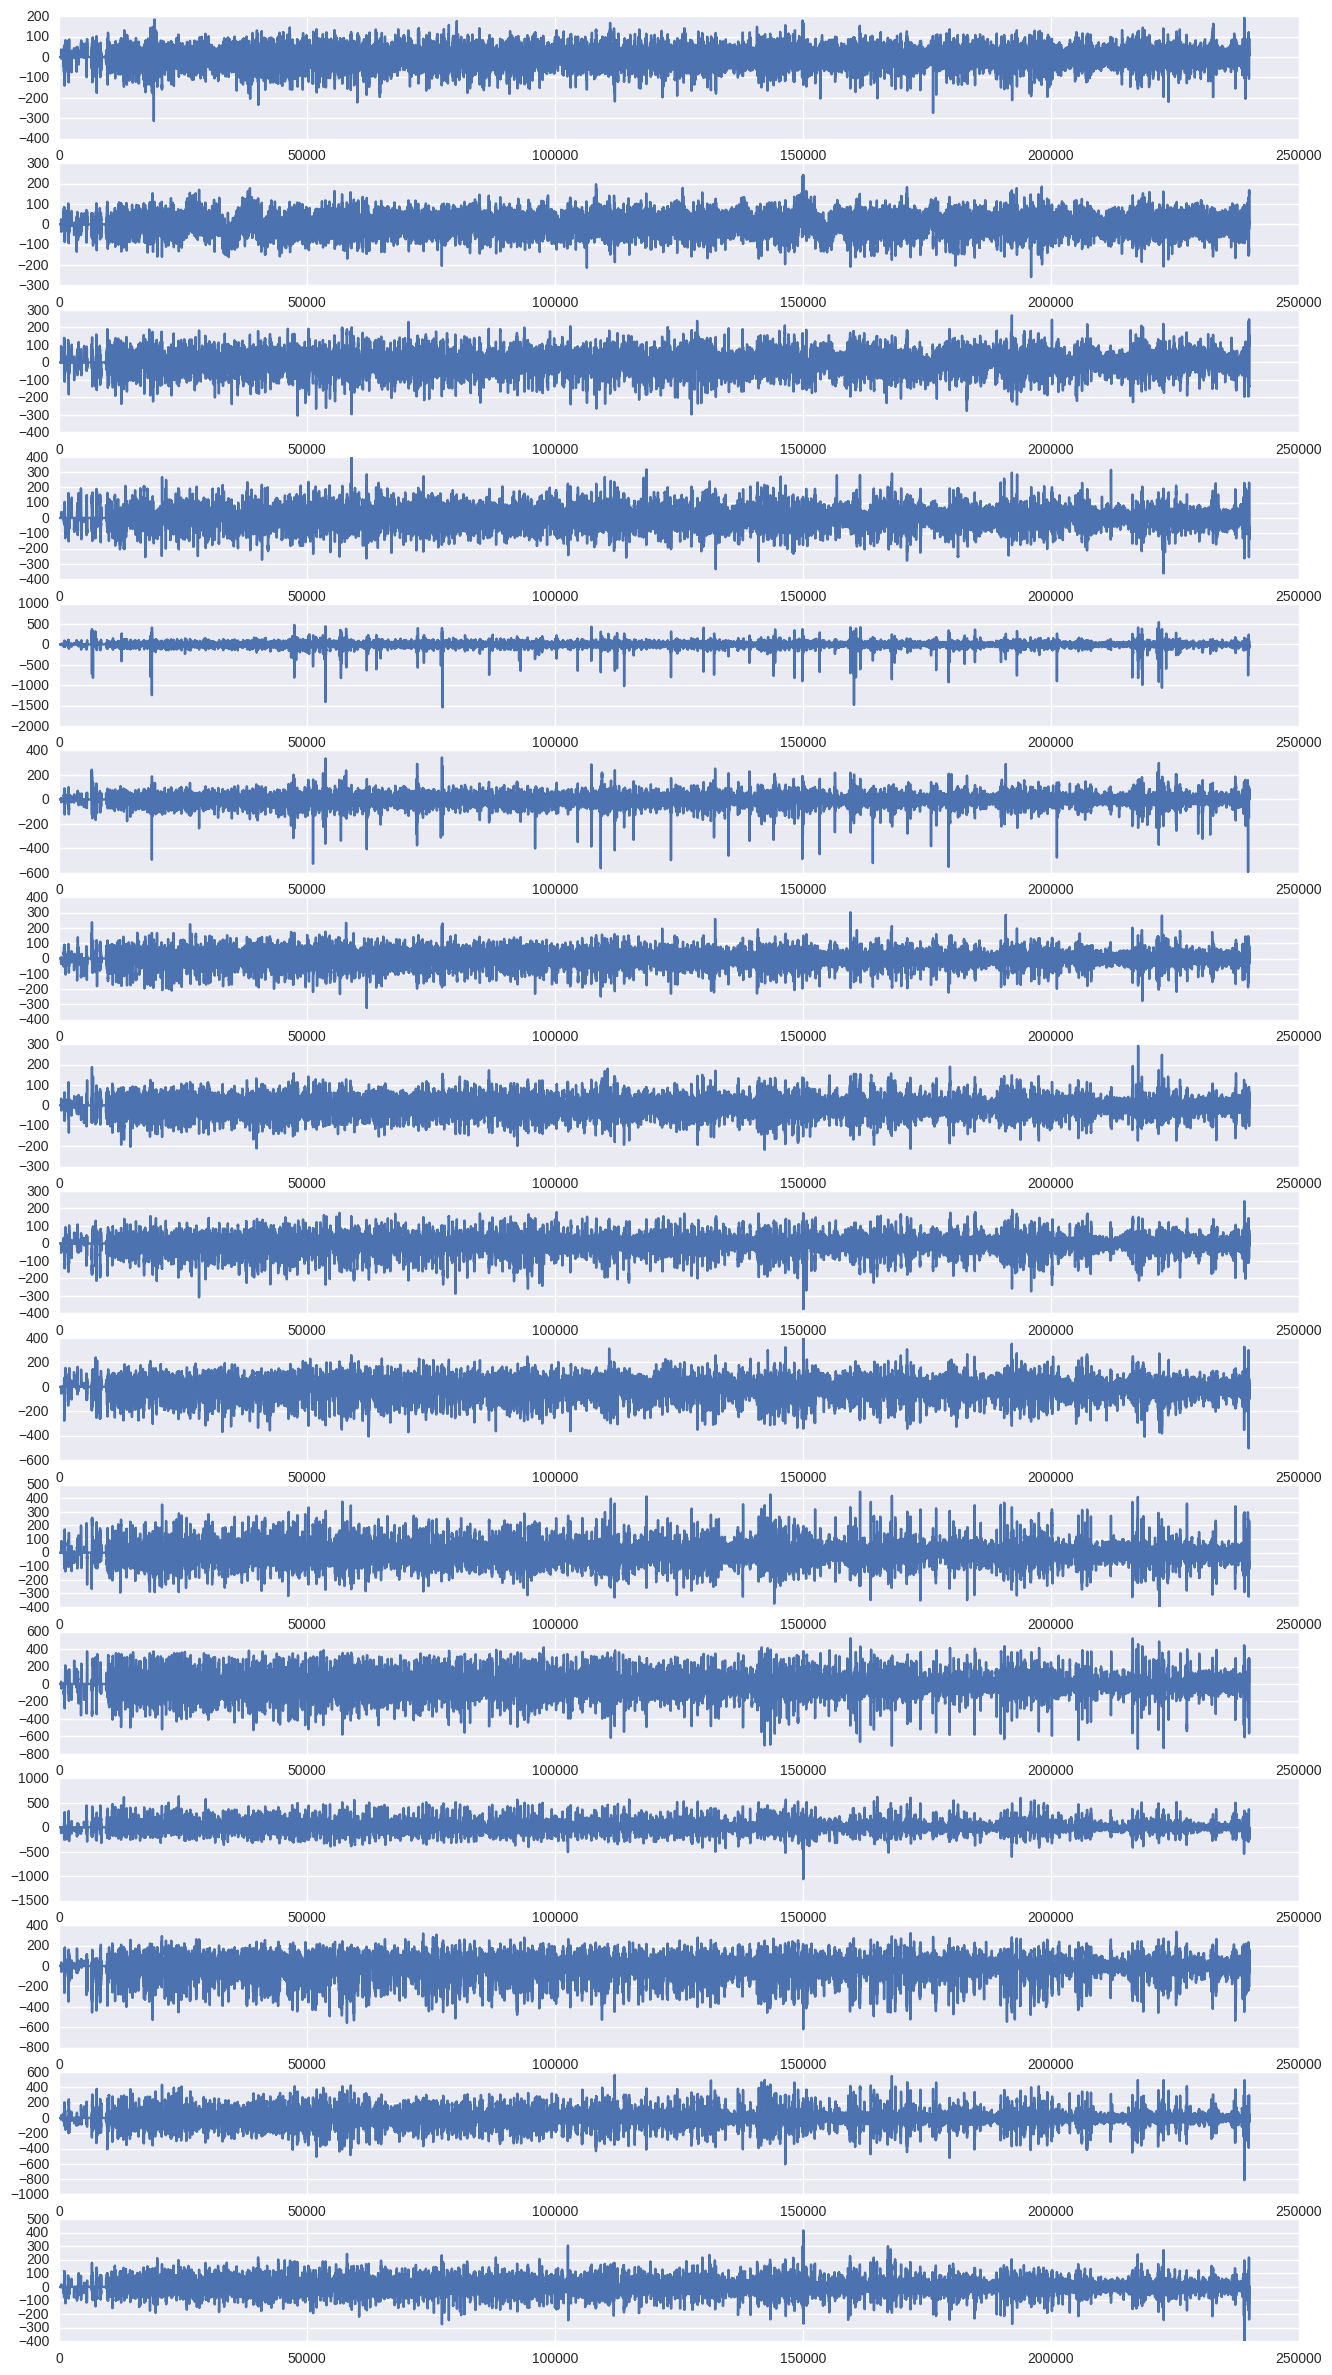

In [56]:
plt.figure(figsize=(16, 30)) 
for i in range(1, 17):
    plt.subplot(16, 1, i)
    plt.plot(df[i])

# Plotting FFT features

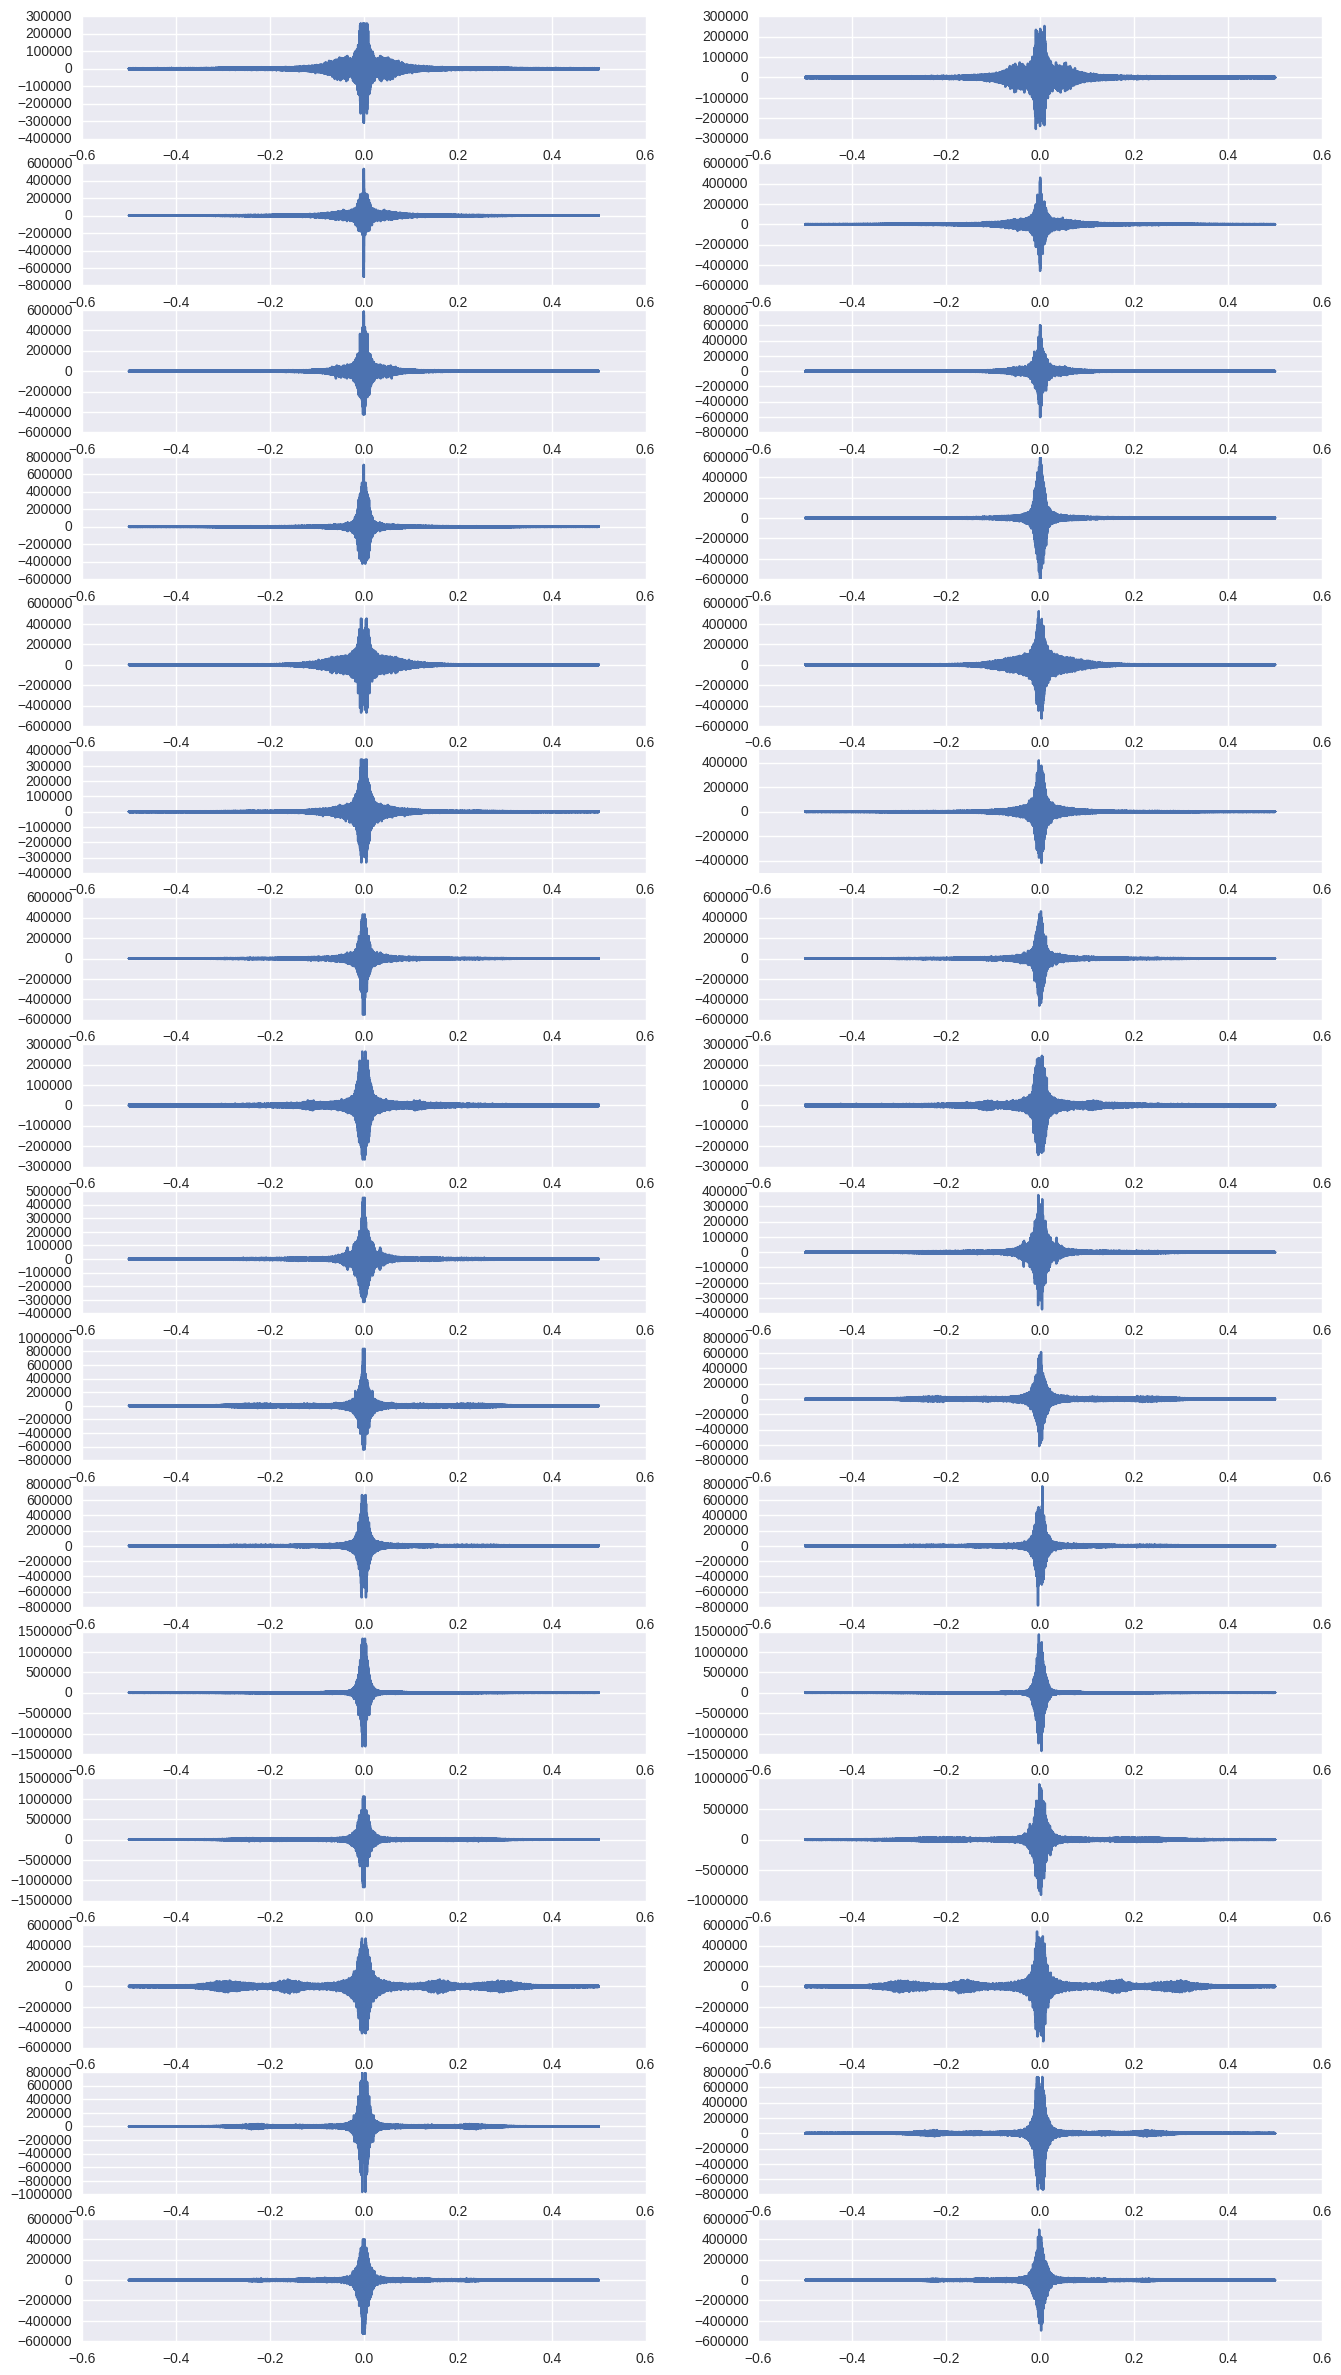

In [62]:
import numpy as np

plt.figure(figsize=(16, 30)) 
for i in range(1, 17):
    sp = np.fft.fft(df[i])
    
    freq = np.fft.fftfreq(df[i].shape[-1])
    plt.subplot(16, 2, 2*(i-1)+1)
    plt.plot(freq, sp.real)
    plt.subplot(16, 2, 2*i)
    plt.plot(freq, sp.imag)